In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
f = h5py.File("/home/ellanti/ML/highrotminhel/data_vz0/velocity0.h5","r")

In [3]:
list(f.keys())

['PS']

In [4]:
ds=f["PS"]
list(ds.keys())

['vx', 'vy', 'vz']

In [5]:
c1=ds["vx"]
c2=ds["vy"]
c3=ds["vz"]
c1.dtype

dtype('<f8')

In [6]:
c1[0]

array([1.2747257 , 1.29178929, 1.30603277, 1.31361191, 1.31480542,
       1.31450419, 1.31857996, 1.32957778, 1.3459324 , 1.36474968,
       1.38465189, 1.40607323, 1.42968238, 1.45515322, 1.4812289 ,
       1.50640554, 1.52950717, 1.54995478, 1.56762772, 1.58252356,
       1.59477019, 1.60496006, 1.61420517, 1.62384842, 1.6351332 ,
       1.64873925, 1.66436393, 1.6810144 , 1.69774809, 1.71379695,
       1.72819348, 1.7399469 , 1.74862404, 1.75433797, 1.75726332,
       1.75751932, 1.75535146, 1.75103701, 1.74468298, 1.73638728,
       1.7264878 , 1.71533444, 1.70285117, 1.68862459, 1.67238645,
       1.65407957, 1.63348852, 1.6101432 , 1.58361285, 1.55380923,
       1.52119047, 1.48670125, 1.45130316, 1.41564359, 1.38014869,
       1.34478158, 1.30858008, 1.27055557, 1.23184671, 1.19644318,
       1.16915693, 1.15285177, 1.14719432, 1.14897354, 1.15311328,
       1.15412805, 1.14784789, 1.13266515, 1.10974301, 1.08241253,
       1.0550872 , 1.03180686, 1.01501575, 1.00537034, 1.00233

In [7]:
import math
mag = np.empty((128,128))
vec = np.empty((128,128))

m,n,o = 0,0,0
for i in range(128):
    for j in range(128):
        p = c1[i][j]
        q = c2[i][j]
        r = c3[i][j]
        mag[i][j] = math.sqrt((q*q+r*r))
        temp1 = math.acos(q/mag[i][j])
        temp2 = math.acos(r/mag[i][j])
        temp2 = math.degrees(temp2)
        if temp2>90:
            vec[i][j] = 360 - math.degrees(temp1)
        else:
            vec[i][j] = math.degrees(temp1)
        #vec[i][j] = math.acos(p/mag[i][j][k])

In [25]:
vec

array([[345.95201814, 349.49395188, 352.25627722, ..., 338.46391517,
        340.19318107, 342.7022518 ],
       [342.86828958, 346.07541247, 349.46350162, ..., 337.08811116,
        338.40364395, 340.27864682],
       [340.38063688, 343.04622614, 346.20682846, ..., 335.7709114 ,
        336.99469517, 338.38330658],
       ...,
       [353.94162988, 351.77640276, 348.01584119, ..., 345.49548268,
        349.53235492, 352.96990313],
       [352.7187394 , 353.59986963, 351.56655688, ..., 342.40917644,
        345.65688419, 349.51874386],
       [349.51491802, 352.50219058, 353.26562962, ..., 340.1691573 ,
        342.53990883, 345.79397891]])

## Using only direction as feature for K Means clustering

In [9]:
df = pd.DataFrame(columns = ["x", "y", "angle", "mag"])

In [10]:
for i in range(128):
    for j in range(128):
        df.loc[len(df.index)] = [i,j,vec[i][j],mag[i][j]]

In [11]:
df1 = df.sample(4000)

In [12]:
df1['id'] = df1.index

In [17]:
df2 = df1[['id', 'angle']].copy()
df2['id'] = 0

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 8)
kmeans.fit(df2)

KMeans()

In [19]:
df1['labels'] = kmeans.labels_
kmeans.cluster_centers_

array([[  0.        ,  58.65296482],
       [  0.        , 301.58776702],
       [  0.        , 200.85021591],
       [  0.        ,  18.52258001],
       [  0.        , 116.08211831],
       [  0.        , 343.05944747],
       [  0.        , 247.74729562],
       [  0.        , 168.01164457]])

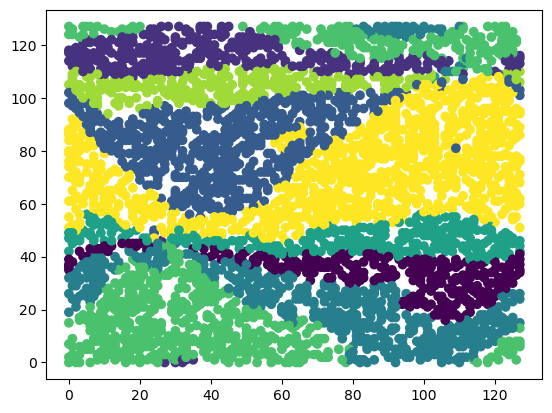

In [20]:
plt.scatter(df1['x'], df1['y'], c=df1['labels'])

## Using both direction and magnitude as features for Kmeans clustering

In [21]:
df2 = df1[['mag', 'angle']].copy()

In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 8)
kmeans.fit(df2)

KMeans()

In [23]:
df1['labels'] = kmeans.labels_
kmeans.cluster_centers_

array([[  0.96203993, 168.20686086],
       [  0.87828518, 302.38446497],
       [  1.04006982,  58.46257723],
       [  0.96214573, 201.15839464],
       [  0.85071279, 116.24988584],
       [  1.08861341, 343.20411182],
       [  0.88047636, 248.51934119],
       [  1.22136485,  18.41286207]])

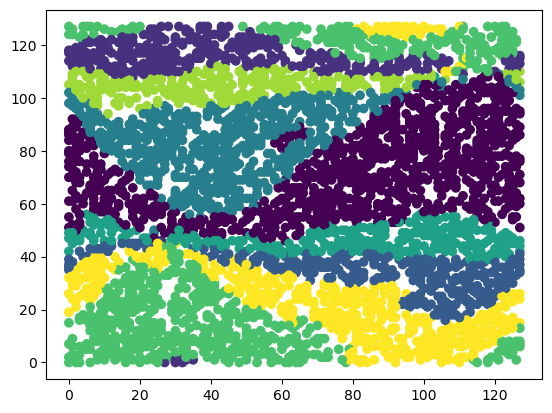

In [24]:
plt.scatter(df1['x'], df1['y'], c=df1['labels'])